In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/calendar.csv", on_bad_lines='skip') ##ignora las líneas problemáticas

In [5]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,97945,2024-12-27,f,$95.00,NaN,2,90
1,97945,2024-12-28,f,$95.00,NaN,2,90
2,97945,2024-12-29,f,$95.00,NaN,2,90
3,97945,2024-12-30,t,$95.00,NaN,2,90
4,97945,2024-12-31,t,$95.00,NaN,2,90


In [6]:
df.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2657220,1319650217063619527,2025-12-22,t,$300.00,NaN,1,365
2657221,1319650217063619527,2025-12-23,t,$300.00,NaN,1,365
2657222,1319650217063619527,2025-12-24,t,$300.00,NaN,1,365
2657223,1319650217063619527,2025-12-25,t,$300.00,NaN,1,365
2657224,1319650217063619527,2025-12-26,t,$300.00,NaN,1,365


In [7]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 2657225
Number of columns: 7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657225 entries, 0 to 2657224
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 141.9+ MB


In [9]:
df.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().any()

listing_id        False
date              False
available         False
price             False
adjusted_price     True
minimum_nights    False
maximum_nights    False
dtype: bool

In [12]:
df.isna().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    2657225
minimum_nights          0
maximum_nights          0
dtype: int64

In [13]:
df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [14]:
df.describe()

,listing_id,adjusted_price,minimum_nights,maximum_nights
count,2.657225e+06,0.0,2.657225e+06,2.657225e+06
mean,6.194381e+17,NaN,8.024699e+00,5.563040e+06
std,5.156283e+17,NaN,3.108959e+01,1.091544e+08
min,9.794500e+04,NaN,1.000000e+00,1.000000e+00
25%,3.845796e+07,NaN,1.000000e+00,3.000000e+01
50%,7.353609e+17,NaN,2.000000e+00,3.650000e+02
75%,1.112765e+18,NaN,4.000000e+00,9.990000e+02
max,1.319650e+18,NaN,9.990000e+02,2.147484e+09


In [15]:
for i in df.columns.tolist():
    print("No hay valores únicos en ",i,df[i].nunique())

No hay valores únicos en  listing_id 7281
No hay valores únicos en  date 372
No hay valores únicos en  available 2
No hay valores únicos en  price 415
No hay valores únicos en  adjusted_price 0
No hay valores únicos en  minimum_nights 93
No hay valores únicos en  maximum_nights 159


In [16]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:", const_cols)

Columnas constantes: []


In [17]:
null_cols = [col for col in df.columns if df[col].isna().all()]
print("Columnas completamente nulas:", null_cols)

Columnas completamente nulas: ['adjusted_price']


In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [19]:
df['available'] = df['available'].astype('category')

In [20]:
df['price'] = df['price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [21]:
low_var_cols = [col for col in df.columns if df[col].nunique() < 5]
print("Columnas con baja variabilidad:", low_var_cols)

Columnas con baja variabilidad: ['available', 'adjusted_price']


In [22]:
df.drop(["adjusted_price","available"], axis=1, inplace=True) 
df.head()

,listing_id,date,price,minimum_nights,maximum_nights
0,97945,2024-12-27,95.0,2,90
1,97945,2024-12-28,95.0,2,90
2,97945,2024-12-29,95.0,2,90
3,97945,2024-12-30,95.0,2,90
4,97945,2024-12-31,95.0,2,90


In [23]:
print(df.columns)

Index(['listing_id', 'date', 'price', 'minimum_nights', 'maximum_nights'], dtype='object')


In [24]:
df.adjusted_price.fillna(0, inplace=True) #ya está borrada
df.head()

AttributeError: 'DataFrame' object has no attribute 'adjusted_price'

In [ ]:
df.isnull().any()

listing_id        False
date              False
price             False
minimum_nights    False
maximum_nights    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657225 entries, 0 to 2657224
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   price           float64       
 3   minimum_nights  int64         
 4   maximum_nights  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 101.4 MB


In [ ]:
df.describe()

,listing_id,date,price,minimum_nights,maximum_nights
count,2.657225e+06,2657225,2.657225e+06,2.657225e+06,2.657225e+06
mean,6.194381e+17,2025-06-26 23:30:59.140268800,1.866744e+02,8.024699e+00,5.563040e+06
min,9.794500e+04,2024-12-27 00:00:00,8.000000e+00,1.000000e+00,1.000000e+00
25%,3.845796e+07,2025-03-28 00:00:00,7.600000e+01,1.000000e+00,3.000000e+01
50%,7.353609e+17,2025-06-27 00:00:00,1.140000e+02,2.000000e+00,3.650000e+02
75%,1.112765e+18,2025-09-26 00:00:00,1.990000e+02,4.000000e+00,9.990000e+02
max,1.319650e+18,2026-01-02 00:00:00,1.100000e+04,9.990000e+02,2.147484e+09
std,5.156283e+17,NaN,3.246250e+02,3.108959e+01,1.091544e+08


In [ ]:
df = df.loc[df['price'] > 0]

In [ ]:
df.shape

(2657225, 5)

In [ ]:
df.describe()

,listing_id,date,price,minimum_nights,maximum_nights
count,2.657225e+06,2657225,2.657225e+06,2.657225e+06,2.657225e+06
mean,6.194381e+17,2025-06-26 23:30:59.140268800,1.866744e+02,8.024699e+00,5.563040e+06
min,9.794500e+04,2024-12-27 00:00:00,8.000000e+00,1.000000e+00,1.000000e+00
25%,3.845796e+07,2025-03-28 00:00:00,7.600000e+01,1.000000e+00,3.000000e+01
50%,7.353609e+17,2025-06-27 00:00:00,1.140000e+02,2.000000e+00,3.650000e+02
75%,1.112765e+18,2025-09-26 00:00:00,1.990000e+02,4.000000e+00,9.990000e+02
max,1.319650e+18,2026-01-02 00:00:00,1.100000e+04,9.990000e+02,2.147484e+09
std,5.156283e+17,NaN,3.246250e+02,3.108959e+01,1.091544e+08


<Figure size 2000x1200 with 0 Axes>

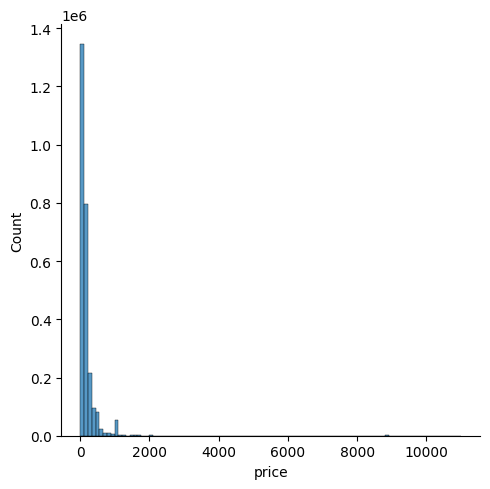

In [ ]:
# check the distribution of price
plt.figure(figsize=(20,12))
sns.displot(df['price'],bins=100)
plt.show()

In [ ]:
# find unique listings
df[['listing_id']].nunique()

listing_id    7281
dtype: int64

In [ ]:
df=pd.read_csv("C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv", on_bad_lines='skip') ##ignora las líneas problemáticas

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20241227033114,2024-12-27,city scrape,Deluxw-Apartm. with roof terrace,NaN,We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,...,4.93,4.78,4.73,NaN,f,2,2,0,0,0.78
1,114695,https://www.airbnb.com/rooms/114695,20241227033114,2024-12-27,city scrape,Apartment Munich/East with sundeck,NaN,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,...,5.00,4.67,4.62,NaN,f,3,3,0,0,0.48
2,127383,https://www.airbnb.com/rooms/127383,20241227033114,2024-12-27,city scrape,City apartment next to Pinakothek,NaN,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,...,4.96,4.91,4.81,NaN,f,1,1,0,0,0.70
3,159634,https://www.airbnb.com/rooms/159634,20241227033114,2024-12-27,previous scrape,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/336144dc-b06d...,765694,...,4.80,4.59,4.45,NaN,t,1,1,0,0,0.27
4,170154,https://www.airbnb.com/rooms/170154,20241227033114,2024-12-27,city scrape,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,...,4.98,4.77,4.91,NaN,f,1,0,1,0,3.55


In [ ]:
df.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7276,1318625666596506954,https://www.airbnb.com/rooms/1318625666596506954,20241227033114,2024-12-27,city scrape,Stylish Home Bogenhausen,Hype two room apartment in Bogenhausen. The br...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,44358496,...,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
7277,1318641181003988391,https://www.airbnb.com/rooms/1318641181003988391,20241227033114,2024-12-27,city scrape,Boho City Livings Munich,Welcome to your stylish boho home in the middl...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,175660452,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
7278,1319473798937477143,https://www.airbnb.com/rooms/1319473798937477143,20241227033114,2024-12-27,city scrape,Welcome to MyCozyHome,"From this centrally located accommodation, you...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,508416232,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
7279,1319597606422421040,https://www.airbnb.com/rooms/1319597606422421040,20241227033114,2024-12-27,city scrape,3-room apartment in the center of Munich,3-room apartment in the center of Munich with ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,594363723,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
7280,1319650217063619527,https://www.airbnb.com/rooms/1319650217063619527,20241227033114,2024-12-27,city scrape,Beautiful apartment-Selverster,"Hi, there is one big apartment with full furni...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,595328708,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN


In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 7281
Number of columns: 75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7281 non-null   int64  
 1   listing_url                                   7281 non-null   object 
 2   scrape_id                                     7281 non-null   int64  
 3   last_scraped                                  7281 non-null   object 
 4   source                                        7281 non-null   object 
 5   name                                          7281 non-null   object 
 6   description                                   7010 non-null   object 
 7   neighborhood_overview                         2564 non-null   object 
 8   picture_url                                   7281 non-null   object 
 9   host_id                                       7281 non-null   i

In [ ]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().any()

id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
source                                          False
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
Length: 75, dtype: bool

In [ ]:
df.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1379
Length: 75, dtype: int64

In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.281000e+03,7.281000e+03,7.281000e+03,7279.000000,7279.000000,0.0,7281.000000,7281.000000,7281.000000,4722.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,7281.000000,7281.000000,7281.000000,7281.000000,5902.000000
mean,6.195128e+17,2.024123e+13,2.002912e+08,5.636626,7.122819,NaN,48.139742,11.563053,2.769674,1.139030,...,4.735713,4.852311,4.865474,4.790410,4.628128,2.945612,2.138030,0.784645,0.004532,1.043478
std,5.156732e+17,0.000000e+00,1.979409e+08,42.430118,49.848934,NaN,0.025549,0.050165,1.648207,0.512805,...,0.413522,0.305526,0.299123,0.307753,0.420937,8.383039,8.256452,2.028043,0.076721,1.751251
min,9.794500e+04,2.024123e+13,1.581000e+03,1.000000,1.000000,NaN,48.071440,11.388350,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.845796e+07,2.024123e+13,2.799445e+07,1.000000,1.000000,NaN,48.123240,11.538370,2.000000,1.000000,...,4.650000,4.820000,4.850000,4.710000,4.500000,1.000000,0.000000,0.000000,0.000000,0.190000
50%,7.353609e+17,2.024123e+13,1.175858e+08,1.000000,2.000000,NaN,48.137090,11.564599,2.000000,1.000000,...,4.880000,4.960000,5.000000,4.880000,4.720000,1.000000,1.000000,0.000000,0.000000,0.500000
75%,1.112765e+18,2.024123e+13,3.766110e+08,2.000000,3.000000,NaN,48.155610,11.586773,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.900000,2.000000,1.000000,1.000000,0.000000,1.240000
max,1.319650e+18,2.024123e+13,6.675842e+08,1140.000000,1307.000000,NaN,48.228020,11.712770,16.000000,23.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,78.000000,78.000000,24.000000,2.000000,48.810000


In [ ]:
for i in df.columns.tolist():
    print("No hay valores únicos en ",i,df[i].nunique())

No hay valores únicos en  id 7281
No hay valores únicos en  listing_url 7281
No hay valores únicos en  scrape_id 1
No hay valores únicos en  last_scraped 2
No hay valores únicos en  source 2
No hay valores únicos en  name 7033
No hay valores únicos en  description 6414
No hay valores únicos en  neighborhood_overview 2290
No hay valores únicos en  picture_url 7066
No hay valores únicos en  host_id 5822
No hay valores únicos en  host_url 5822
No hay valores únicos en  host_name 2533
No hay valores únicos en  host_since 3088
No hay valores únicos en  host_location 327
No hay valores únicos en  host_about 2097
No hay valores únicos en  host_response_time 4
No hay valores únicos en  host_response_rate 55
No hay valores únicos en  host_acceptance_rate 100
No hay valores únicos en  host_is_superhost 2
No hay valores únicos en  host_thumbnail_url 5521
No hay valores únicos en  host_picture_url 5521
No hay valores únicos en  host_neighbourhood 72
No hay valores únicos en  host_listings_count 32

In [ ]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:", const_cols)

Columnas constantes: ['scrape_id']


In [ ]:
null_cols = [col for col in df.columns if df[col].isna().all()]
print("Columnas completamente nulas:", null_cols)

Columnas completamente nulas: ['neighbourhood_group_cleansed', 'calendar_updated']


In [ ]:
low_var_cols = [col for col in df.columns if df[col].nunique() < 5]
print("Columnas con baja variabilidad:", low_var_cols)

Columnas con baja variabilidad: ['scrape_id', 'last_scraped', 'source', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'instant_bookable', 'calculated_host_listings_count_shared_rooms']


In [ ]:
df.drop(["id","scrape_id","host_url","host_thumbnail_url","host_picture_url","picture_url","listing_url","neighbourhood_group_cleansed","neighborhood_overview","description","calendar_updated","source","host_verifications","license"], axis=1, inplace=True) 
df.head()

,last_scraped,name,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-12-27,Deluxw-Apartm. with roof terrace,517685,Angelika,2011-04-18,"Munich, Germany",Ich freue mich auf viele internationale Gäste!...,a few days or more,25%,6%,...,4.90,4.93,4.78,4.73,f,2,2,0,0,0.78
1,2024-12-27,Apartment Munich/East with sundeck,581737,Stephan,2011-05-12,"Munich, Germany",I am looking forward to meet interesting peopl...,within a few hours,100%,98%,...,4.97,5.00,4.67,4.62,f,3,3,0,0,0.48
2,2024-12-27,City apartment next to Pinakothek,630556,Sonja,2011-05-26,"Munich, Germany","Hi, mein Name ist Sonja und ich freue mich net...",within a few hours,67%,89%,...,4.98,4.96,4.91,4.81,f,1,1,0,0,0.70
3,2024-12-27,"Fancy, bright central roof top flat and homeof...",765694,Susana,2011-07-01,"Munich, Germany",outdoorsy sportive Person from Munich. I love ...,within an hour,100%,92%,...,4.75,4.80,4.59,4.45,t,1,1,0,0,0.27
4,2024-12-27,"Own floor & bath, parking & breakfast",108297,Alex,2010-04-14,"Munich, Germany",We love to travel and dream of living in a hou...,within a few hours,100%,100%,...,4.99,4.98,4.77,4.91,f,1,0,1,0,3.55


In [ ]:
print(df.columns)

Index(['last_scraped', 'name', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 

In [ ]:
df.isnull().any()

last_scraped                                    False
name                                            False
host_id                                         False
host_name                                        True
host_since                                       True
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
Length: 61, dtype: bool

In [ ]:
df['host_name'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df.head()

C:\Users\Rocio\AppData\Local\Temp\ipykernel_10944\192256593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_name'].fillna(0, inplace=True)
C:\Users\Rocio\AppData\Local\Temp\ipykernel_10944\192256593.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

,last_scraped,name,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-12-27,Deluxw-Apartm. with roof terrace,517685,Angelika,2011-04-18,"Munich, Germany",Ich freue mich auf viele internationale Gäste!...,a few days or more,25%,6%,...,4.90,4.93,4.78,4.73,f,2,2,0,0,0.78
1,2024-12-27,Apartment Munich/East with sundeck,581737,Stephan,2011-05-12,"Munich, Germany",I am looking forward to meet interesting peopl...,within a few hours,100%,98%,...,4.97,5.00,4.67,4.62,f,3,3,0,0,0.48
2,2024-12-27,City apartment next to Pinakothek,630556,Sonja,2011-05-26,"Munich, Germany","Hi, mein Name ist Sonja und ich freue mich net...",within a few hours,67%,89%,...,4.98,4.96,4.91,4.81,f,1,1,0,0,0.70
3,2024-12-27,"Fancy, bright central roof top flat and homeof...",765694,Susana,2011-07-01,"Munich, Germany",outdoorsy sportive Person from Munich. I love ...,within an hour,100%,92%,...,4.75,4.80,4.59,4.45,t,1,1,0,0,0.27
4,2024-12-27,"Own floor & bath, parking & breakfast",108297,Alex,2010-04-14,"Munich, Germany",We love to travel and dream of living in a hou...,within a few hours,100%,100%,...,4.99,4.98,4.77,4.91,f,1,0,1,0,3.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  7281 non-null   object 
 1   name                                          7281 non-null   object 
 2   host_id                                       7281 non-null   int64  
 3   host_name                                     7281 non-null   object 
 4   host_since                                    7279 non-null   object 
 5   host_location                                 5723 non-null   object 
 6   host_about                                    2811 non-null   object 
 7   host_response_time                            4666 non-null   object 
 8   host_response_rate                            4666 non-null   object 
 9   host_acceptance_rate                          5854 non-null   o

In [ ]:
df.describe()

,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.281000e+03,7279.000000,7279.000000,7281.000000,7281.000000,7281.000000,4722.000000,6502.000000,4724.000000,7281.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,7281.000000,7281.000000,7281.000000,7281.000000,7281.000000
mean,2.002912e+08,5.636626,7.122819,48.139742,11.563053,2.769674,1.139030,1.251615,1.637172,7.841368,...,4.735713,4.852311,4.865474,4.790410,4.628128,2.945612,2.138030,0.784645,0.004532,0.845847
std,1.979409e+08,42.430118,49.848934,0.025549,0.050165,1.648207,0.512805,1.059553,1.339486,30.866323,...,0.413522,0.305526,0.299123,0.307753,0.420937,8.383039,8.256452,2.028043,0.076721,1.628844
min,1.581000e+03,1.000000,1.000000,48.071440,11.388350,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.799445e+07,1.000000,1.000000,48.123240,11.538370,2.000000,1.000000,1.000000,1.000000,1.000000,...,4.650000,4.820000,4.850000,4.710000,4.500000,1.000000,0.000000,0.000000,0.000000,0.060000
50%,1.175858e+08,1.000000,2.000000,48.137090,11.564599,2.000000,1.000000,1.000000,1.000000,2.000000,...,4.880000,4.960000,5.000000,4.880000,4.720000,1.000000,1.000000,0.000000,0.000000,0.330000
75%,3.766110e+08,2.000000,3.000000,48.155610,11.586773,4.000000,1.000000,1.000000,2.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,4.900000,2.000000,1.000000,1.000000,0.000000,1.000000
max,6.675842e+08,1140.000000,1307.000000,48.228020,11.712770,16.000000,23.000000,50.000000,23.000000,999.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,78.000000,78.000000,24.000000,2.000000,48.810000


In [ ]:
df.shape

(7281, 61)

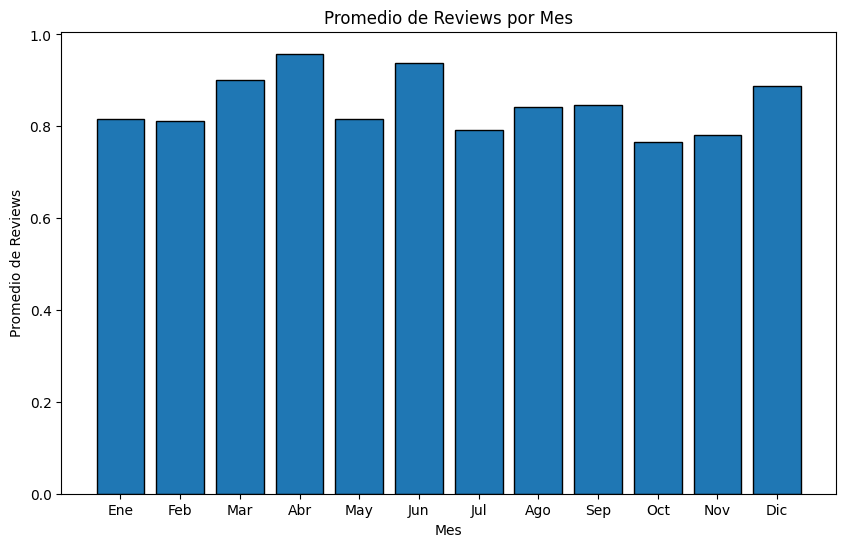

In [ ]:
# Crear la columna 'month' (asegúrate de que exista)
df['month'] = np.random.randint(1, 13, size=len(df))  

# Agrupar por mes y calcular el promedio de reviews_per_month
monthly_reviews = df.groupby('month')['reviews_per_month'].mean()

# Graficar los datos agrupados por mes
plt.figure(figsize=(10, 6))
plt.bar(monthly_reviews.index, monthly_reviews.values, edgecolor='black')  
plt.title('Promedio de Reviews por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Reviews')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

In [ ]:
# find unique hosts
df[['host_id']].nunique()

host_id    5822
dtype: int64

In [ ]:
df = pd.read_csv(r"C:\Users\Rocio\Desktop\ROCÍO\Todo_rocío\Curso_Data_Analyst\Codes\temario\temario\Informe 2-Upgrade\neighbourhoods.csv", on_bad_lines='skip') #ignora las líneas problemáticas

In [27]:
df.head()

,neighbourhood_group,neighbourhood
0,NaN,Allach-Untermenzing
1,NaN,Altstadt-Lehel
2,NaN,Aubing-Lochhausen-Langwied
3,NaN,Au-Haidhausen
4,NaN,Berg am Laim


In [28]:
df.tail()

,neighbourhood_group,neighbourhood
20,NaN,Sendling
21,NaN,Sendling-Westpark
22,NaN,Thalkirchen-Obersendling-Forstenried-Fürstenri...
23,NaN,Tudering-Riem
24,NaN,Untergiesing-Harlaching


In [29]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 25
Number of columns: 2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        25 non-null     object 
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


In [31]:
df.dtypes

neighbourhood_group    float64
neighbourhood           object
dtype: object

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.isna().any()

neighbourhood_group     True
neighbourhood          False
dtype: bool

In [34]:
df.isna().sum()

neighbourhood_group    25
neighbourhood           0
dtype: int64

In [35]:
df.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

In [36]:
df.describe()

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [37]:
for i in df.columns.tolist():
    print("No hay valores únicos en ",i,df[i].nunique())

No hay valores únicos en  neighbourhood_group 0
No hay valores únicos en  neighbourhood 25


In [40]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:", const_cols)

Columnas constantes: []


In [41]:
null_cols = [col for col in df.columns if df[col].isna().all()]
print("Columnas completamente nulas:", null_cols)

Columnas completamente nulas: ['neighbourhood_group']


In [42]:
low_var_cols = [col for col in df.columns if df[col].nunique() < 5]
print("Columnas con baja variabilidad:", low_var_cols)

Columnas con baja variabilidad: ['neighbourhood_group']


In [43]:
df.drop(["neighbourhood_group"], axis=1, inplace=True) 
df.head()

,neighbourhood
0,Allach-Untermenzing
1,Altstadt-Lehel
2,Aubing-Lochhausen-Langwied
3,Au-Haidhausen
4,Berg am Laim


In [44]:
df.columns

Index(['neighbourhood'], dtype='object')

In [45]:
df.isnull().any()

neighbourhood    False
dtype: bool

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   neighbourhood  25 non-null     object
dtypes: object(1)
memory usage: 332.0+ bytes


In [47]:
df.describe()

,neighbourhood
count,25
unique,25
top,Allach-Untermenzing
freq,1


In [48]:
df.shape

(25, 1)

In [74]:
df=pd.read_csv("C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/reviews.csv", on_bad_lines='skip') ##ignora las líneas problemáticas

In [75]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,97945,591337,2011-10-03,508190,Lauren,We very much enjoyed staying at Angelika's apa...
1,97945,796084,2011-12-20,341171,Marty & Evelyn,"Angelika was a very gracious host, and went ou..."
2,97945,964528,2012-03-02,1647967,Sue,The apartment was beautiful and Angelika provi...
3,97945,1353862,2012-05-26,2414638,Mel And George,We loved the warm welcome and was pleasantly s...
4,97945,1375610,2012-05-29,2323197,Anais,"Dès notre arrivée, notre hote nous a cordialem..."


In [76]:
df.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments
203109,1300763958110951287,1318088082702645693,2024-12-23,69264332,Nancy,Place was exactly as advertised.<br/>Literally...
203110,1302802610453075904,1307182199737004862,2024-12-08,357917503,OliverGabriel V,"Very good and quiet location, would stay again"
203111,1302873421886981666,1304319666182338745,2024-12-04,665165849,Calum,Charming host and lovely apartment
203112,1303436233723417574,1317289961141271413,2024-12-22,61687115,Erica,Very good central location close to metro stop...
203113,1303761439223515284,1317297376364308633,2024-12-22,82623155,Nikita,The place is great! The neighbourhood is very ...


In [77]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 203114
Number of columns: 6


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203114 entries, 0 to 203113
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     203114 non-null  int64 
 1   id             203114 non-null  int64 
 2   date           203114 non-null  object
 3   reviewer_id    203114 non-null  int64 
 4   reviewer_name  203114 non-null  object
 5   comments       203099 non-null  object
dtypes: int64(3), object(3)
memory usage: 9.3+ MB


In [79]:
df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.isna().any()

listing_id       False
id               False
date             False
reviewer_id      False
reviewer_name    False
comments          True
dtype: bool

In [82]:
df.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         15
dtype: int64

In [83]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [84]:
df.describe()

,listing_id,id,reviewer_id
count,2.031140e+05,2.031140e+05,2.031140e+05
mean,1.991359e+17,6.198529e+17,1.831585e+08
std,3.785919e+17,5.027574e+17,1.706322e+08
min,9.794500e+04,2.976850e+05,1.000000e+00
25%,8.264691e+06,4.921626e+08,3.969432e+07
50%,2.930124e+07,7.287574e+17,1.242886e+08
75%,5.173816e+07,1.094093e+18,2.900463e+08
max,1.313865e+18,1.324624e+18,6.681921e+08


In [85]:
for i in df.columns.tolist():
    print("No hay valores únicos en ",i,df[i].nunique())

No hay valores únicos en  listing_id 5902
No hay valores únicos en  id 203114
No hay valores únicos en  date 4540
No hay valores únicos en  reviewer_id 190165


No hay valores únicos en  reviewer_name 36668
No hay valores únicos en  comments 196437


In [86]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:", const_cols)

Columnas constantes: []


In [87]:
null_cols = [col for col in df.columns if df[col].isna().all()]
print("Columnas completamente nulas:", null_cols)

Columnas completamente nulas: []


In [88]:
low_var_cols = [col for col in df.columns if df[col].nunique() < 5]
print("Columnas con baja variabilidad:", low_var_cols)

Columnas con baja variabilidad: []


In [89]:
df.drop(["comments","id"], axis=1, inplace=True) 
df.head()

,listing_id,date,reviewer_id,reviewer_name
0,97945,2011-10-03,508190,Lauren
1,97945,2011-12-20,341171,Marty & Evelyn
2,97945,2012-03-02,1647967,Sue
3,97945,2012-05-26,2414638,Mel And George
4,97945,2012-05-29,2323197,Anais


In [90]:
print(df.columns)

Index(['listing_id', 'date', 'reviewer_id', 'reviewer_name'], dtype='object')


In [91]:
df.isnull().any()

listing_id       False
date             False
reviewer_id      False
reviewer_name    False
dtype: bool

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203114 entries, 0 to 203113
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     203114 non-null  int64 
 1   date           203114 non-null  object
 2   reviewer_id    203114 non-null  int64 
 3   reviewer_name  203114 non-null  object
dtypes: int64(2), object(2)
memory usage: 6.2+ MB


In [93]:
df.describe()

,listing_id,reviewer_id
count,2.031140e+05,2.031140e+05
mean,1.991359e+17,1.831585e+08
std,3.785919e+17,1.706322e+08
min,9.794500e+04,1.000000e+00
25%,8.264691e+06,3.969432e+07
50%,2.930124e+07,1.242886e+08
75%,5.173816e+07,2.900463e+08
max,1.313865e+18,6.681921e+08


In [94]:
df.dtypes

listing_id        int64
date             object
reviewer_id       int64
reviewer_name    object
dtype: object

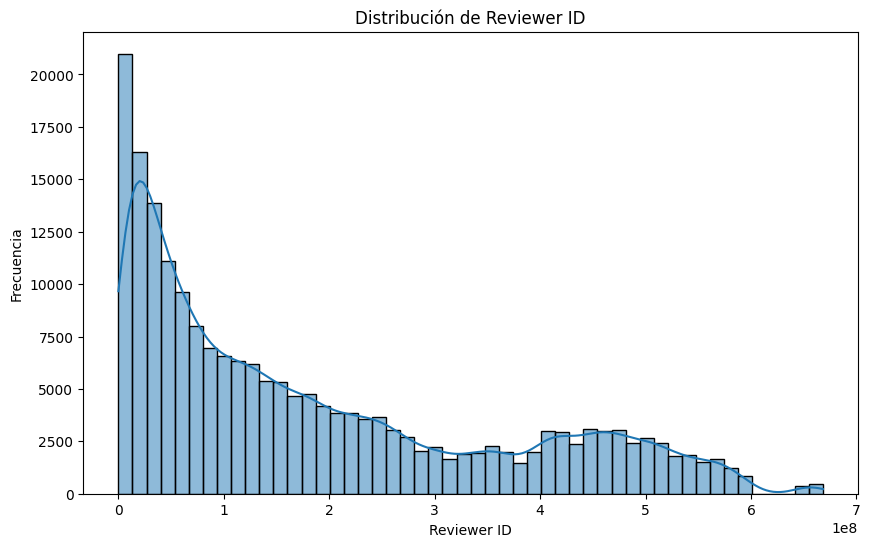

In [101]:
# Histograma para reviewer_id
plt.figure(figsize=(10, 6))
sns.histplot(df['reviewer_id'], bins=50, kde=True)
plt.title('Distribución de Reviewer ID')
plt.xlabel('Reviewer ID')
plt.ylabel('Frecuencia')
plt.show()

In [102]:
# find unique reviewers
df[['reviewer_id']].nunique()

reviewer_id    190165
dtype: int64